# Projeto de DS | Acidentes em Porto Alegre #

## Introdução ##

## 1. Fazer a carga dos dados ##

In [90]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [2]:
# Definir o número máximo de colunas como 'None' para que todas as colunas sejam exibidas.
pd.set_option("display.max_columns", None)

In [3]:
# Obter diretório raiz do projeto.
dirname = os.path.dirname(os.path.abspath(""))

# Obter diretório de dados do projeto.
data_dir = os.path.join(dirname, "data")

# Obter diretório de dados de entrada do projeto.
raw_data = os.path.join(data_dir, "raw/")

Ler o arquivo csv.

In [4]:
acidentes_poa = pd.read_csv(raw_data + "cat_acidentes.csv", sep=";")

In [5]:
acidentes_poa.head()

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2024-03-01 01:33:50,0.0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,5,0,190816,0.0,0.000000e+00,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2024-03-01 01:33:50,6699.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0,655726,-817840587.0,1.295680e+09,AV ASSIS BRASIL,NaN,ABALROAMENTO,TERÇA-FEIRA,02:45:00.0000000,NOITE,NORTE,NaN
2,2024-03-01 01:33:50,411.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,5,0,655729,-826760803.0,1.292030e+09,R DR BARROS CASSAL,NaN,ABALROAMENTO,TERÇA-FEIRA,07:36:00.0000000,DIA,CENTRO,NaN
3,2024-03-01 01:33:50,1500.0,0.0,2019-01-01 00:00:00,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0,655732,-827227451.0,1.285404e+09,AV FABIO ARAUJO SANTOS,NaN,CHOQUE,TERÇA-FEIRA,16:50:00.0000000,DIA,SUL,NaN
4,2024-03-01 01:33:50,8799.0,0.0,2019-01-01 00:00:00,5,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0,655735,-820146494.0,1.288712e+09,AV IPIRANGA,NaN,COLISÃO,TERÇA-FEIRA,19:00:00.0000000,NOITE,LESTE,NaN


In [6]:
acidentes_poa.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66210 entries, 0 to 66209
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data_extracao  66210 non-null  object 
 1   predial1       63427 non-null  float64
 2   queda_arr      66210 non-null  float64
 3   data           66210 non-null  object 
 4   feridos        66210 non-null  int64  
 5   feridos_gr     66210 non-null  int64  
 6   mortes         66210 non-null  int64  
 7   morte_post     66210 non-null  int64  
 8   fatais         66210 non-null  int64  
 9   auto           66210 non-null  int64  
 10  taxi           66210 non-null  int64  
 11  lotacao        66210 non-null  int64  
 12  onibus_urb     66210 non-null  int64  
 13  onibus_met     66210 non-null  int64  
 14  onibus_int     66210 non-null  int64  
 15  caminhao       66210 non-null  int64  
 16  moto           66210 non-null  int64  
 17  carroca        66210 non-null  int64  
 18  bicicl

In [7]:
# Converter 'hora' para formato de hora
acidentes_poa['hora'] = pd.to_datetime(acidentes_poa['hora'], format='%H:%M:%S.%f').dt.time


In [8]:
acidentes_poa

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2024-03-01 01:33:50,0.0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,5,0,190816,0.000000e+00,0.000000e+00,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00,NOITE,NORTE,NaN
1,2024-03-01 01:33:50,6699.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0,655726,-8.178406e+08,1.295680e+09,AV ASSIS BRASIL,NaN,ABALROAMENTO,TERÇA-FEIRA,02:45:00,NOITE,NORTE,NaN
2,2024-03-01 01:33:50,411.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,5,0,655729,-8.267608e+08,1.292030e+09,R DR BARROS CASSAL,NaN,ABALROAMENTO,TERÇA-FEIRA,07:36:00,DIA,CENTRO,NaN
3,2024-03-01 01:33:50,1500.0,0.0,2019-01-01 00:00:00,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0,655732,-8.272275e+08,1.285404e+09,AV FABIO ARAUJO SANTOS,NaN,CHOQUE,TERÇA-FEIRA,16:50:00,DIA,SUL,NaN
4,2024-03-01 01:33:50,8799.0,0.0,2019-01-01 00:00:00,5,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0,655735,-8.201465e+08,1.288712e+09,AV IPIRANGA,NaN,COLISÃO,TERÇA-FEIRA,19:00:00,NOITE,LESTE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66205,2024-03-01 01:33:50,310.0,0.0,2024-02-28 00:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,742397,-5.113069e+01,-2.997849e+01,R UNIAO,NaN,ATROPELAMENTO,QUARTA-FEIRA,21:50:00,NOITE,NORTE,NaN
66206,2024-03-01 01:33:50,847.0,0.0,2024-02-28 00:00:00,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,5,0,742398,NaN,NaN,R CRUZEIRO DO SUL,NaN,NAO CADASTRADO,QUARTA-FEIRA,21:24:00,NOITE,SUL,NaN
66207,2024-03-01 01:33:50,282.0,0.0,2024-02-28 00:00:00,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,742399,-5.116411e+01,-3.000224e+01,R VARZEA,NaN,NAO CADASTRADO,QUARTA-FEIRA,19:29:00,NOITE,NORTE,NaN
66208,2024-03-01 01:33:50,555.0,0.0,2024-02-28 00:00:00,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,742400,-5.121902e+01,-3.008019e+01,R ORFANOTROFIO,NaN,COLISÃO,QUARTA-FEIRA,16:05:00,DIA,SUL,NaN


In [9]:
# Calculate the number of non-null rows per column
non_null_count = acidentes_poa.count()

null_count = acidentes_poa.isnull().sum()

# Calculate the percentage of null values for each column
null_percentage = acidentes_poa.isnull().mean() * 100

# Create a new dataframe to hold the results
df_info = pd.DataFrame(
    {
        "freq_nao_nulos": non_null_count,
        "freq_nulos": null_count,
        "perc_nulos": null_percentage,
    }
)

# Format the 'Null Percentage (%)' column to have two decimal places
df_info["perc_nulos"] = df_info["perc_nulos"].round(2)

df_info

,freq_nao_nulos,freq_nulos,perc_nulos
data_extracao,66210,0,0.00
predial1,63427,2783,4.20
queda_arr,66210,0,0.00
data,66210,0,0.00
feridos,66210,0,0.00
feridos_gr,66210,0,0.00
mortes,66210,0,0.00
morte_post,66210,0,0.00
fatais,66210,0,0.00
auto,66210,0,0.00


In [10]:
# Contar número de colunas sem valores nulos
non_null_count = df_info[df_info["freq_nulos"] == 0].count()
print("Número de colunas sem valores nulos:", non_null_count["freq_nulos"])

Número de colunas sem valores nulos: 26


In [11]:
df_info.loc[df_info["freq_nulos"] == 0]

,freq_nao_nulos,freq_nulos,perc_nulos
data_extracao,66210,0,0.0
queda_arr,66210,0,0.0
data,66210,0,0.0
feridos,66210,0,0.0
feridos_gr,66210,0,0.0
mortes,66210,0,0.0
morte_post,66210,0,0.0
fatais,66210,0,0.0
auto,66210,0,0.0
taxi,66210,0,0.0


In [12]:
# Select object columns
object_columns = acidentes_poa.select_dtypes(include=["object"])

# Get a sample
object_columns_sample = object_columns.sample(10)

object_columns_sample

,data_extracao,data,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
30418,2024-03-01 01:33:50,2021-09-08 00:00:00,AV DR NILO PECANHA,NaN,COLISÃO,QUARTA-FEIRA,15:45:00,DIA,LESTE,NaN
13105,2024-03-01 01:33:50,2019-12-28 00:00:00,AV VICENTE MONTEGGIA,AV DA CAVALHADA,CHOQUE,SÁBADO,15:00:00,DIA,SUL,NaN
57089,2024-03-01 01:33:50,2023-07-25 00:00:00,AV LOUREIRO DA SILVA,R JOSE DO PATROCINIO,ABALROAMENTO,TERÇA-FEIRA,22:30:00,NOITE,CENTRO,NaN
38144,2024-03-01 01:33:50,2022-04-12 00:00:00,R RAMIRO BARCELOS,NaN,COLISÃO,TERÇA-FEIRA,15:00:00,DIA,CENTRO,NaN
63453,2024-03-01 01:33:50,2023-12-19 00:00:00,AV INDEPENDENCIA,NaN,COLISÃO,TERÇA-FEIRA,13:00:00,DIA,CENTRO,NaN
34655,2024-03-01 01:33:50,2021-12-23 00:00:00,AV ERICO VERISSIMO,R GEN CALDWELL,ABALROAMENTO,QUINTA-FEIRA,19:50:00,NOITE,SUL,NaN
5012,2024-03-01 01:33:50,2019-05-25 00:00:00,R DOM PEDRO II,NaN,ABALROAMENTO,SÁBADO,05:05:00,NOITE,NORTE,NaN
22194,2024-03-01 01:33:50,2020-12-24 00:00:00,R RAMIRO BARCELOS,NaN,COLISÃO,QUINTA-FEIRA,17:06:00,DIA,CENTRO,NaN
2895,2024-03-01 01:33:50,2019-03-18 00:00:00,ESTR JOAO DE OLIVEIRA REMIAO,NaN,ABALROAMENTO,SEGUNDA-FEIRA,00:02:00,NOITE,LESTE,NaN
53729,2024-03-01 01:33:50,2023-05-07 00:00:00,R DONA MARGARIDA,R AUGUSTO SEVERO,COLISÃO,DOMINGO,00:10:00,NOITE,NORTE,NaN


In [13]:
acidentes_poa.sample(10)

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
13186,2024-03-01 01:33:50,476.0,0.0,2020-01-06 00:00:00,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,669267,-5.114257e+01,-3.002998e+01,AV ALBERTO PASQUALINI,NaN,ABALROAMENTO,SEGUNDA-FEIRA,06:40:00,DIA,NORTE,NaN
40282,2024-03-01 01:33:50,1990.0,0.0,2022-06-08 00:00:00,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,696505,-5.116399e+01,-3.002900e+01,AV JOAO WALLIG,NaN,ABALROAMENTO,QUARTA-FEIRA,14:15:00,DIA,LESTE,NaN
26121,2024-03-01 01:33:50,0.0,0.0,2021-05-17 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,682215,-5.118437e+01,-3.000820e+01,AV ASSIS BRASIL,AV MAJOR DIONISIO DORNELES,EVENTUAL,SEGUNDA-FEIRA,17:45:00,DIA,NORTE,NaN
1187,2024-03-01 01:33:50,535.0,0.0,2019-02-15 00:00:00,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,657130,-5.114875e+01,-3.006104e+01,AV ANTONIO CARVALHO,NaN,ABALROAMENTO,SEXTA-FEIRA,18:30:00,NOITE,LESTE,NaN
4011,2024-03-01 01:33:50,476.0,0.0,2019-04-08 00:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,660052,-8.236884e+08,1.292771e+09,AV PLINIO BRASIL MILANO,NaN,CHOQUE,SEGUNDA-FEIRA,20:40:00,NOITE,LESTE,NaN
43151,2024-03-01 01:33:50,255.0,0.0,2022-08-24 00:00:00,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,699376,-5.117881e+01,-3.002273e+01,R FREI HENRIQUE GOLLAND TRINDADE O F M,NaN,CHOQUE,QUARTA-FEIRA,17:30:00,DIA,NORTE,NaN
17612,2024-03-01 01:33:50,0.0,1.0,2020-07-09 00:00:00,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,673694,0.000000e+00,0.000000e+00,R TOMAZ GONZAGA,AV DR NILO PECANHA,ABALROAMENTO,QUINTA-FEIRA,22:05:00,NOITE,LESTE,NaN
13089,2024-03-01 01:33:50,555.0,0.0,2020-01-05 00:00:00,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,669170,NaN,NaN,AV MAUA,NaN,ABALROAMENTO,DOMINGO,18:15:00,NOITE,CENTRO,NaN
47135,2024-03-01 01:33:50,0.0,0.0,2022-11-20 00:00:00,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,703362,-5.116225e+01,-3.002291e+01,AV TULIO DE ROSE,NaN,CHOQUE,DOMINGO,15:15:00,DIA,NORTE,NaN
4458,2024-03-01 01:33:50,1880.0,0.0,2019-05-21 00:00:00,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,1,0,660499,-8.225588e+08,1.291313e+09,AV CARLOS GOMES,NaN,COLISÃO,TERÇA-FEIRA,12:30:00,DIA,LESTE,NaN


In [14]:
acidentes_poa.describe(exclude=["number"])

,data_extracao,data,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
count,66210,66210,66163,18715,66210,66210,65818,66210,66209,2255
unique,1,1900,4091,1965,10,7,1359,2,4,23
top,2024-03-01 01:33:50,2023-08-11 00:00:00,AV PROTASIO ALVES,AV IPIRANGA,ABALROAMENTO,SEXTA-FEIRA,18:00:00,DIA,LESTE,CARRIS
freq,66210,73,1848,412,30208,11276,1037,46991,20669,576


## 1. Investigação da Estrutura ##
Quantas colunas e linhas o dataset apresenta?

In [15]:
acidentes_poa.shape

(66210, 34)

Temos um conjunto de dados composto por:
- **30062** observações
- **30** variáveis

Quais os tipos de dados apresentados nessas variáveis?

In [16]:
# Contar a frequência de tipos de dados presentes no conjunto de dados.
pd.Series(acidentes_poa.dtypes).value_counts()

int64      20
object     10
float64     4
Name: count, dtype: int64

### 1.1. Estrutura das variáveis não numéricas ###

In [17]:
# Apresentar variáveis não-numéricas.
acidentes_poa.select_dtypes(exclude=["number"]).head()

,data_extracao,data,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2024-03-01 01:33:50,2020-10-17 00:00:00,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00,NOITE,NORTE,NaN
1,2024-03-01 01:33:50,2019-01-01 00:00:00,AV ASSIS BRASIL,NaN,ABALROAMENTO,TERÇA-FEIRA,02:45:00,NOITE,NORTE,NaN
2,2024-03-01 01:33:50,2019-01-01 00:00:00,R DR BARROS CASSAL,NaN,ABALROAMENTO,TERÇA-FEIRA,07:36:00,DIA,CENTRO,NaN
3,2024-03-01 01:33:50,2019-01-01 00:00:00,AV FABIO ARAUJO SANTOS,NaN,CHOQUE,TERÇA-FEIRA,16:50:00,DIA,SUL,NaN
4,2024-03-01 01:33:50,2019-01-01 00:00:00,AV IPIRANGA,NaN,COLISÃO,TERÇA-FEIRA,19:00:00,NOITE,LESTE,NaN


Fazer rápida investigação de quantos valores únicos não-numéricos cada variável possui e quais são os valores mais proeminentes.

In [18]:
acidentes_poa.describe(exclude=["number"])

,data_extracao,data,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
count,66210,66210,66163,18715,66210,66210,65818,66210,66209,2255
unique,1,1900,4091,1965,10,7,1359,2,4,23
top,2024-03-01 01:33:50,2023-08-11 00:00:00,AV PROTASIO ALVES,AV IPIRANGA,ABALROAMENTO,SEXTA-FEIRA,18:00:00,DIA,LESTE,CARRIS
freq,66210,73,1848,412,30208,11276,1037,46991,20669,576


Em termos de **valores únicos**, podemos fazer algumas observações:
- Há uma variedade significativa nos logradouros (`log1` e `log2`), tipos de acidente (`tipo_acid`), dias da semana(`dia_sem`), horários (`hora`), bem como outras variáveis, tais como `noite_dia`, `regiao` e `consorcio`. Podemos inferir uma diversidade nos locais e circunstâncias dos acidentes.
Em termos de **insights específicos**:
- **Datas de Acidentes** (`data`). Com 1900 datas únicas de acidentes, observa-se o dia `23-08-11` como o de **maior frequência** - **73** observações - , o que sugere possível pico ou entrada de dados em massa nesta data.
- **Logradouros** (`log1` e `log2`). `AV PROTASIO ALVES` apresenta o maior número de logradouros de acidente. `AV IPIRANGA`, como logradouro de cruzamento, apresenta a maior frequência. 
- **Tipo de Acidente** (`tipo_acid`). Ao observar-se `ABALROAMENTO` como categoria com maior frequência de registros - quase metade da contagem de observações -, podemos inferir que colisões entre veículos constitui o cenário mais frequente.
- **Dia da Semana** (`dia_sem`). Podemos observar que `SEXTA-FEIRA` apresenta grande frequência de linhas, o que pode refletir tanto um aumento da atividade veicular quanto alteração de comportamento de risco no final da semana.
- **Hora** (`hora`). A predominância de `18:00` indica a coincidência de acidentes com picos de trânsito no fim do dia.
- **Período do Dia** (`noite_dia`). A predominância de `DIA` demonstra que, em conjunto com as variáveis anteriores, pode haver uma correlação positiva entre maior atividade de trânsito e número de acidentes.
- **Região** (`regiao`). A participação expressiva da região `LESTE` pode indicar condições de tráfego/infraestrutura que contribuem para maior número de incidentes.
- **Consórcio** (`consorcio`). Aqui, há um baixo número de observações em relação ao conjunto de dados; apesar de `CARRIS` predominar, muitos registros não expecificam o consórcio envolvido, o que sugere uma exploração desses dados em correlação com o envolvimento de veículos de transporte públicos. 

### 1.2. Estrutura de variáveis numéricas.
Nosso objetivo é investigar quantas variáveis únicas cada uma dessas variáveis apresenta. Esse processo nos fornecerá insights tais como o número de variáveis **binárias**, **ordinais** e **contínuas**.

<Axes: title={'center': 'Valores únicos por variável numérica'}>

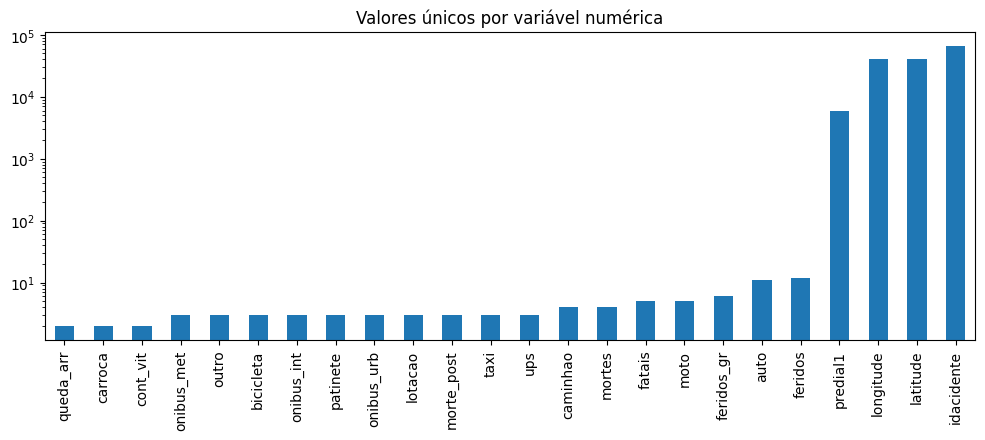

In [19]:
# Para cada feature numérica, computar o número de entradas únicas.
unique_values = acidentes_poa.select_dtypes(include="number").nunique().sort_values()

# Plotar a informação com o eixo y em escala logarítmica. Informar o número de variáveis por feature.
unique_values.plot.bar(
    logy=True, figsize=(12, 4), title="Valores únicos por variável numérica"
)

Vamos observar o número de valores únicos por variável e atribuir 3 categorias possíveis baseando-se **apenas** na variabilidade de observações únicas: 
- **binárias**. Apenas dois valores, que, em geral, buscam responder sim/não para determinada observação.
- **discretas contáveis**. Entre 3 a 10 valores aproximdamente, representam valores que podem ser ordenados sem ambiguidade. Variáveis que representam contagens de itens ou ocorrências. Elas podem assumir um número limitado de valores, mas esses valores representam contagens e podem ser tratados de forma semelhante a variáveis contínuas em muitos contextos de análise.
- **contínuos/variáveis de razão**. Com 10 ou mais valores, representam distâncias iguais entre os pontos de medição e apresentam um zero verdadeiro. 

In [20]:
# Definir uma função para categorizar as variáveis
def categorize_variables(n):
    """
    Categorizar o número de valores únicos em uma variável.
    Argumentos:
    n -- número de valores únicos em uma variável.
    """
    if n == 2:
        return "binária"
    elif 3 <= n <= 10:
        return "discreta contável"
    else:
        return "contínua"


# Aplicar a função para categorizar as variáveis.
unique_values_cat = pd.DataFrame(unique_values, columns=["unique_values"])
unique_values_cat["categoria"] = unique_values_cat["unique_values"].apply(
    lambda x: categorize_variables(int(x))
)

In [21]:
unique_values_cat

,unique_values,categoria
queda_arr,2,binária
carroca,2,binária
cont_vit,2,binária
onibus_met,3,discreta contável
outro,3,discreta contável
bicicleta,3,discreta contável
onibus_int,3,discreta contável
patinete,3,discreta contável
onibus_urb,3,discreta contável
lotacao,3,discreta contável


Observações baseadas no número de valores únicos somente:
- **Variáveis binárias**. Deve-se atentar aqui para o significado de cada coluna, o que depende de uma consulta ao dicionário de dados. Sabemos que `queda_arr` é um valor efetivamente binário, na medida em que retorna `1` caso tenha havido queda de veículo em arroio. `cont_vit` também informa se houve ou não vítimas. Já `carroca` informa o número de carroças envolvidas no acidente.
- **Discretas contáveis**. Sabe-se que todas as variáveis quantitativas podem ser ordenadas. Na maioria dos casos, podemos considerá-las como discretas contáveis. Representam o número de veículos ou feridos graves envolvidos nos acidentes.
- **Contínuas**. Ainda, a diferenciação depende do projeto, mas podemos confirmar pelo momento as variáveis marcadas como `contínua` como tal. Vamos determinar com maior precisão essa classificação em seguida.

## 2. Investigação de Qualidade.
Nosso objetivo é obter um panorama geral da qualidade do conjunto de dados. Vamos investigar:
- Duplicatas
- Valores faltantes
- Inserções indesejadas ou erros de inserção.

### 2.1 Duplicatas

In [22]:
acidentes_poa.columns

Index(['data_extracao', 'predial1', 'queda_arr', 'data', 'feridos',
       'feridos_gr', 'mortes', 'morte_post', 'fatais', 'auto', 'taxi',
       'lotacao', 'onibus_urb', 'onibus_met', 'onibus_int', 'caminhao', 'moto',
       'carroca', 'bicicleta', 'outro', 'cont_vit', 'ups', 'patinete',
       'idacidente', 'longitude', 'latitude', 'log1', 'log2', 'tipo_acid',
       'dia_sem', 'hora', 'noite_dia', 'regiao', 'consorcio'],
      dtype='object')

In [23]:
# Checar o número de duplicatas ignorando o id do acidente para evitar contagem de duplicatas de acidentes diferentes.
n_duplicates = acidentes_poa.drop(labels=["idacidente"], axis=1).duplicated().sum()
print(f"Aparentemente, existem {n_duplicates} duplicatas no conjunto de dados.")

Aparentemente, existem 57 duplicatas no conjunto de dados.


In [24]:
# Retornar as linhas em que existem duplicatas ignorando o id do acidente.
duplicates = acidentes_poa[
    acidentes_poa.drop(labels=["idacidente"], axis=1).duplicated(keep=False)
]
duplicates

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
4516,2024-03-01 01:33:50,0.0,0.0,2019-05-24 00:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,660558,-5.124136e+08,1.287559e+09,AV PINHEIRO BORDA,R TAQUARY,EVENTUAL,SEXTA-FEIRA,15:40:00,DIA,SUL,NaN
4517,2024-03-01 01:33:50,0.0,0.0,2019-05-24 00:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,660559,-5.124136e+08,1.287559e+09,AV PINHEIRO BORDA,R TAQUARY,EVENTUAL,SEXTA-FEIRA,15:40:00,DIA,SUL,NaN
6588,2024-03-01 01:33:50,0.0,0.0,2019-07-12 00:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,662648,NaN,NaN,R DA CONCEICAO,NaN,CHOQUE,SEXTA-FEIRA,04:00:00,NOITE,CENTRO,NaN
6591,2024-03-01 01:33:50,0.0,0.0,2019-07-12 00:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,662651,NaN,NaN,R DA CONCEICAO,NaN,CHOQUE,SEXTA-FEIRA,04:00:00,NOITE,CENTRO,NaN
9364,2024-03-01 01:33:50,232.0,0.0,2019-09-30 00:00:00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0,665434,-8.262615e+08,1.290759e+09,AV JERONIMO DE ORNELAS,NaN,ATROPELAMENTO,SEGUNDA-FEIRA,18:20:00,NOITE,CENTRO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59301,2024-03-01 01:33:50,975.0,0.0,2023-09-08 00:00:00,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,735488,-5.121856e+01,-3.004096e+01,R GEN LIMA E SILVA,NaN,COLISÃO,SEXTA-FEIRA,20:14:00,NOITE,CENTRO,NaN
59387,2024-03-01 01:33:50,6690.0,0.0,2023-09-15 00:00:00,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,735574,-5.117641e+01,-3.005747e+01,AV IPIRANGA,NaN,ABALROAMENTO,SEXTA-FEIRA,15:30:00,DIA,LESTE,NaN
59606,2024-03-01 01:33:50,6690.0,0.0,2023-09-15 00:00:00,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,735793,-5.117641e+01,-3.005747e+01,AV IPIRANGA,NaN,ABALROAMENTO,SEXTA-FEIRA,15:30:00,DIA,LESTE,NaN
63417,2024-03-01 01:33:50,159.0,0.0,2023-12-12 00:00:00,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,739608,-5.119824e+01,-3.001950e+01,R QUINTINO BOCAIUVA,NaN,ABALROAMENTO,TERÇA-FEIRA,14:00:00,DIA,LESTE,NaN


Podemos seguir adiante e remover essas duplicatas.

In [25]:
# Extrair nome de colunas com todas as features com exceção de 'idacidente'.
columns_to_consider = acidentes_poa.drop(labels=["idacidente"], axis=1).columns

# Remover duplicatas baseadas nas colunas extraídas.
acidentes_poa = acidentes_poa.drop_duplicates(subset=columns_to_consider)
acidentes_poa.shape

(66153, 34)

## 2.2. Valores faltantes
Vamos investigar se há "buracos" no nosso conjunto de dados. Por exemplo, amostras ou variáveis com grande número de valores faltantes. Essa etapa pode nos ajudar a evitar viés de seleção, por exemplo.

### 2.2.1. Por amostra ###

Text(0, 0.5, 'Número de amostras')

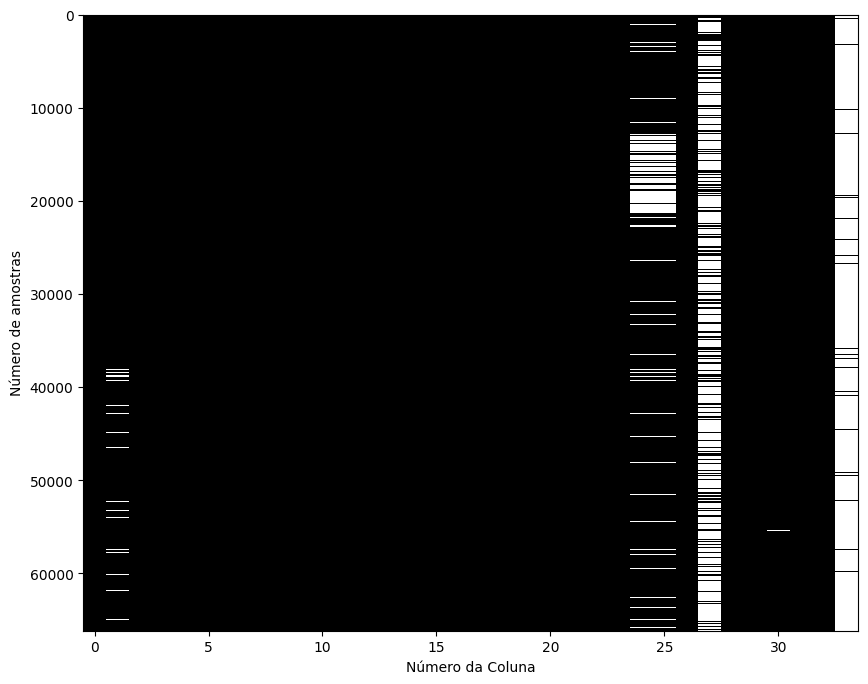

In [26]:
plt.figure(figsize=(10, 8))
plt.imshow(acidentes_poa.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Número da Coluna")
plt.ylabel("Número de amostras")

Não parece haver uma grande "lacuna" de dados. Vamos usar a biblioteca `missingno` para plotar um gráfico mais descritivo.

<Axes: >

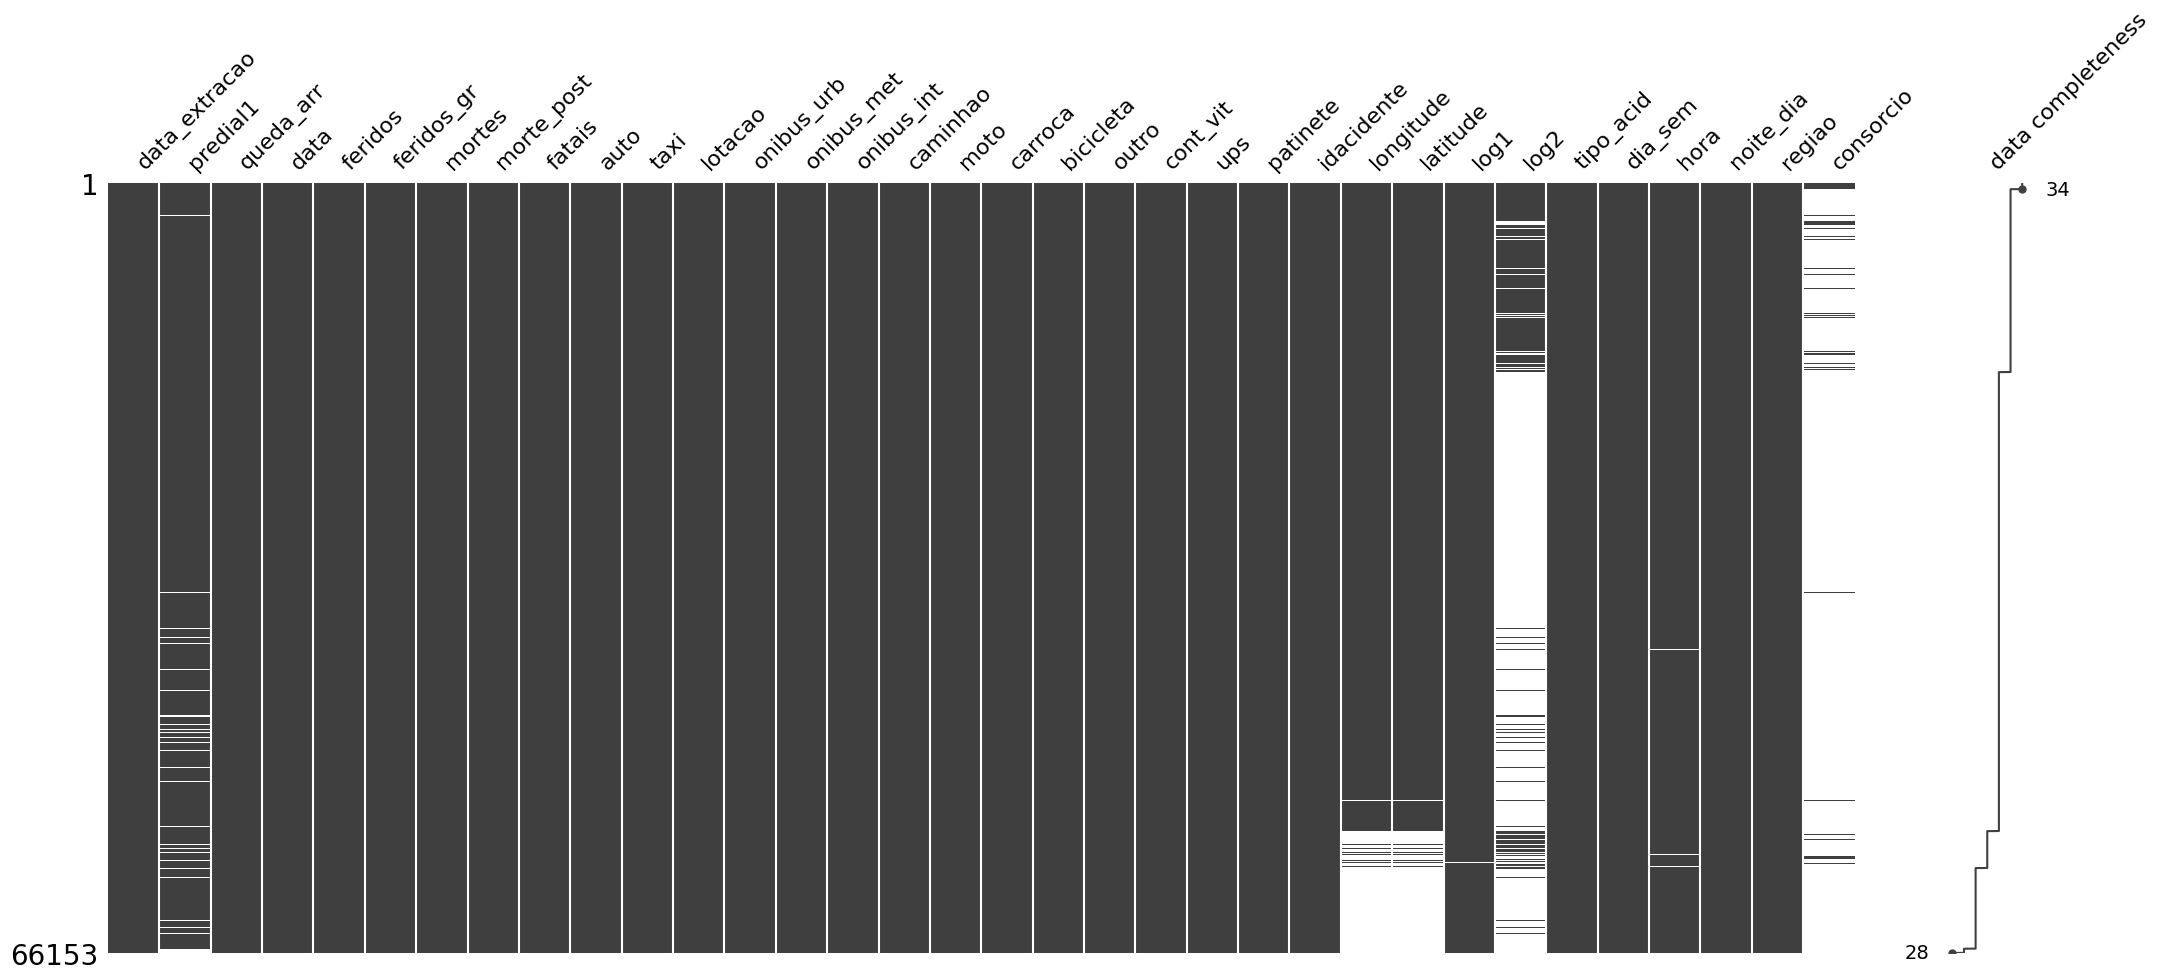

In [27]:
msno.matrix(acidentes_poa, labels=True, sort="descending")

Baseado nos dois gráficos, podemos observar que há uma grande ausência de observações em `consorcio`e `log2` o que, no contexto do conjunto dos dados, não necessariamente significa a não inserção intencional de dados ou por negligência. Considerando-se que o preenchimento de empresas de consórcio de transporte público depende do envolvimento de veículos de transporte público em acidentes, não necessariamente há falta de dados. O melhor seria criar uma variável binária identificando a participação desses veículos para, daí sim, verificar se o número de valores faltantes bate com o número de observações com o envolvimento dessa classe de veículo. 

Agora, há uma ausência expressiva em `log2`, o que indica que nem sempre foram identificados cruzamentos com outras ruas. Este não parece ser necessariamente um problema de valores faltantes por negligência.

Os campos `latitude`e `longitude` também apresentam um valor, ainda que bem menor, expressivo. Nesse sentido, sim, pode-se inferir certa negligência ao não preencher a localidade do acidente. Seria possível inferir esses campos ao compará-los com observações em localidades próximas que tenham essas coordenadas?
Por fim, há alguns campos com valores faltantes tais como `predial1` e `hora`, que podem ser inferidos também em alguns casos.

Pelo momento, não iremos remover nenhum desses valores faltantes.

### 2.2.2. Por variável
Vamos agora observar o número de valores faltantes por variável e definir a razão de valores faltantes **por variável**.

<Axes: title={'center': 'Porcentagem de valores faltantes por coluna'}, ylabel='Razão de valores faltantes por coluna'>

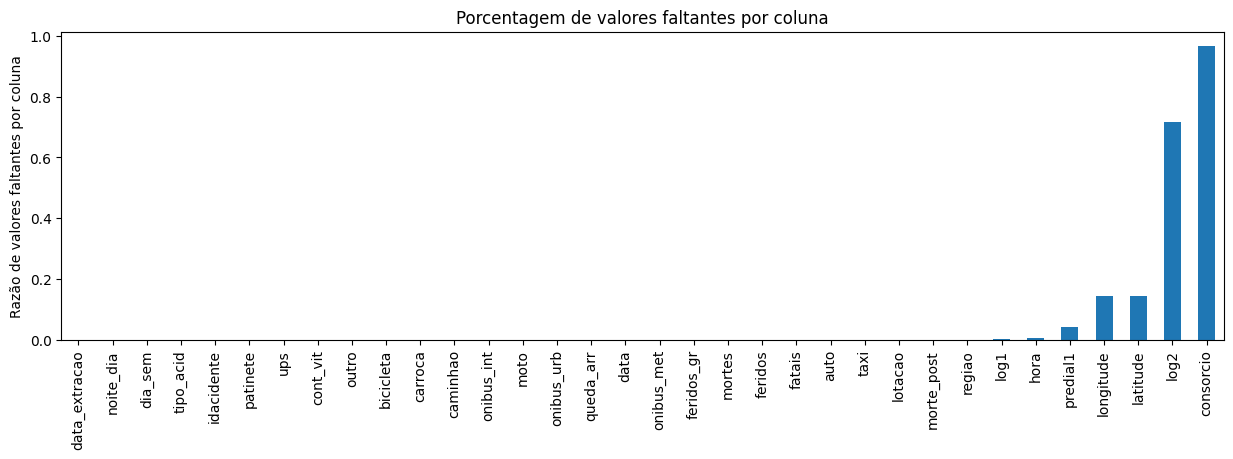

In [28]:
acidentes_poa.isna().mean().sort_values().plot(
    kind="bar",
    figsize=(15, 4),
    title="Porcentagem de valores faltantes por coluna",
    ylabel="Razão de valores faltantes por coluna",
)

Como podemos ver, `log2` e `consorcio` apresentam uma proporção grande de valores faltantes. Como estamos realizando uma análise exploratória inicial, não vamos remover nenhuma coluna. Muito provavelmente, no entanto, não iremos usar essas duas variáveis.

## 2.3 Inserções indesejadas e erros de inserção.
Aqui, vamos discutir a distinção de amostras com erros ou inserções indevidas em relação a **valores extremos**. Queremos remover valores que **nunca deveriam ter sido inseridos**. 
No nosso caso, podemos pensar em coordenadas fora da cidade de Porto Alegre, por exemplo, ou um número de vítimas ou veículos envolvidos com algum valor absurdo. Essa etapa, certamente, dependerá de alguma análise holística do conjunto de dados e o que ele está refletindo na realidade.

### 2.3.1. Variáveis numéricas ###


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

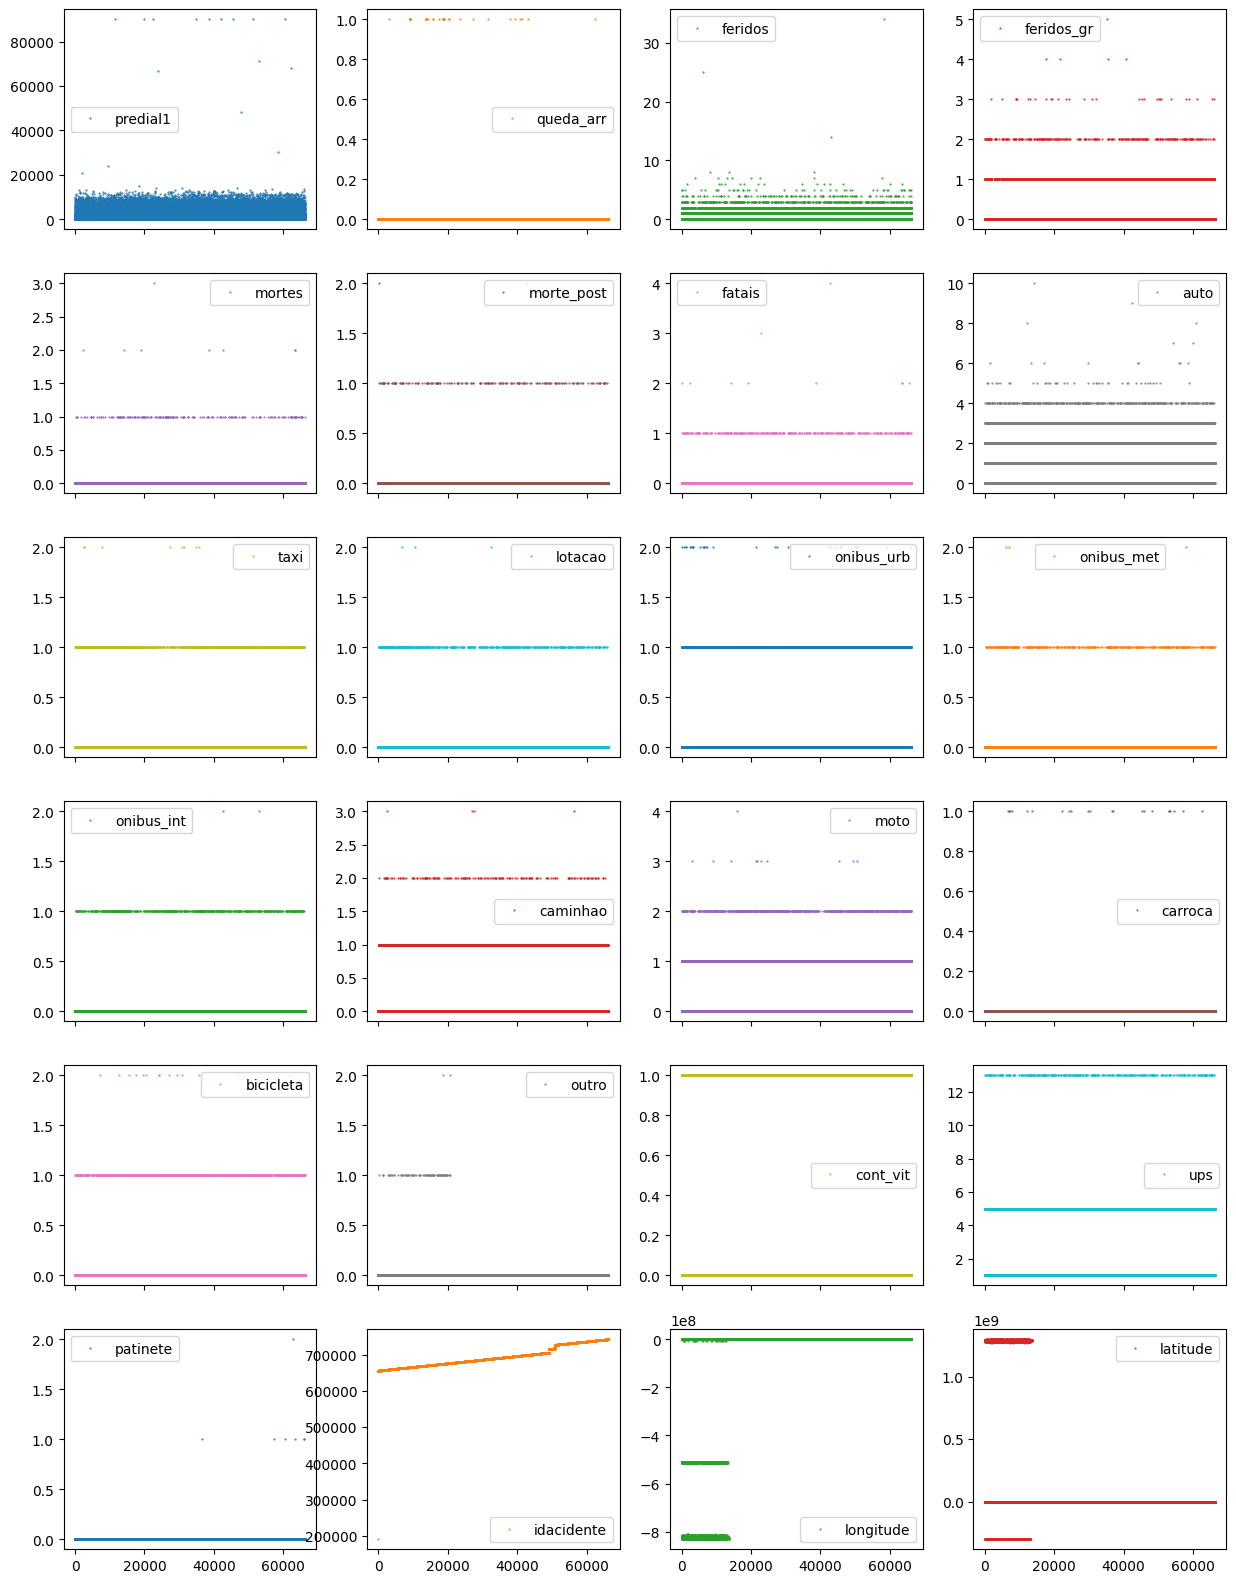

In [29]:
acidentes_poa.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(15, 20), markersize=1)

Vamos tomar um tempo e analisar esses resultados.

No geral, a maior parte das colunas parece apresentar dados corretos. Até mesmo casos como `feridos`, que apresenta alguns valores extremos, apresentam valores corretos. Nesse caso, fiz uma checagem rápida de uma entrada com 34 feridos, que bate com notícia reportada publicamente. Os outros dados, como localização e data, também conferem com o reportado.

- [link para notícia](https://g1.globo.com/rs/rio-grande-do-sul/noticia/2023/08/22/acidente-carro-e-onibus-deixa-feridos-zona-norte-porto-alegre.ghtml)

Agora, os campos de coordenadas apresentam grandes inconsistências. A latitude de porto Alegre é `-30.033056`, enquanto a longitude é `-51.230000`. Vamos rapidamente descrever esses campos:

In [30]:
# Return description in normal notation and not scientific
acidentes_poa[["latitude", "longitude"]].describe()
acidentes_poa[["latitude", "longitude"]].describe().apply(lambda s: s.apply(lambda x: format(x, "f")))

,latitude,longitude
count,56601.000000,56601.000000
mean,207354575.285975,-131953320.453818
std,479803761.818610,293112563.615754
min,-301861333.000000,-831414582.000000
25%,-30.059350,-51.228091
50%,-30.029558,-51.199869
75%,-29.999987,-51.163797
max,1298214440.000000,0.000000


Pode-se claramente verificar que houve erros na inserção de dados. Alguns campos contêm valores absurdos, que não condizem com a realidade.

Em relação aos outros campos, os valores parecem estar dentro da normalidade.

### 2.3.1. Variáveis não numéricas. ###


In [31]:
# Extrair propriedades estatísticas das variáveis não-numéricas.
acidentes_poa.describe(exclude=["number", "datetime"])

,data_extracao,data,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
count,66153,66153,66106,18712,66153,66153,65761,66153,66152,2255
unique,1,1900,4091,1965,10,7,1359,2,4,23
top,2024-03-01 01:33:50,2023-08-11 00:00:00,AV PROTASIO ALVES,AV IPIRANGA,ABALROAMENTO,SEXTA-FEIRA,18:00:00,DIA,LESTE,CARRIS
freq,66153,73,1846,412,30192,11263,1036,46955,20653,576


Para verificar a qualidade desses tipos de dados, podemos criar uma iteração por cada uma das features a plotar o número de ocorrência de cada uma de acordo com os valores únicos.

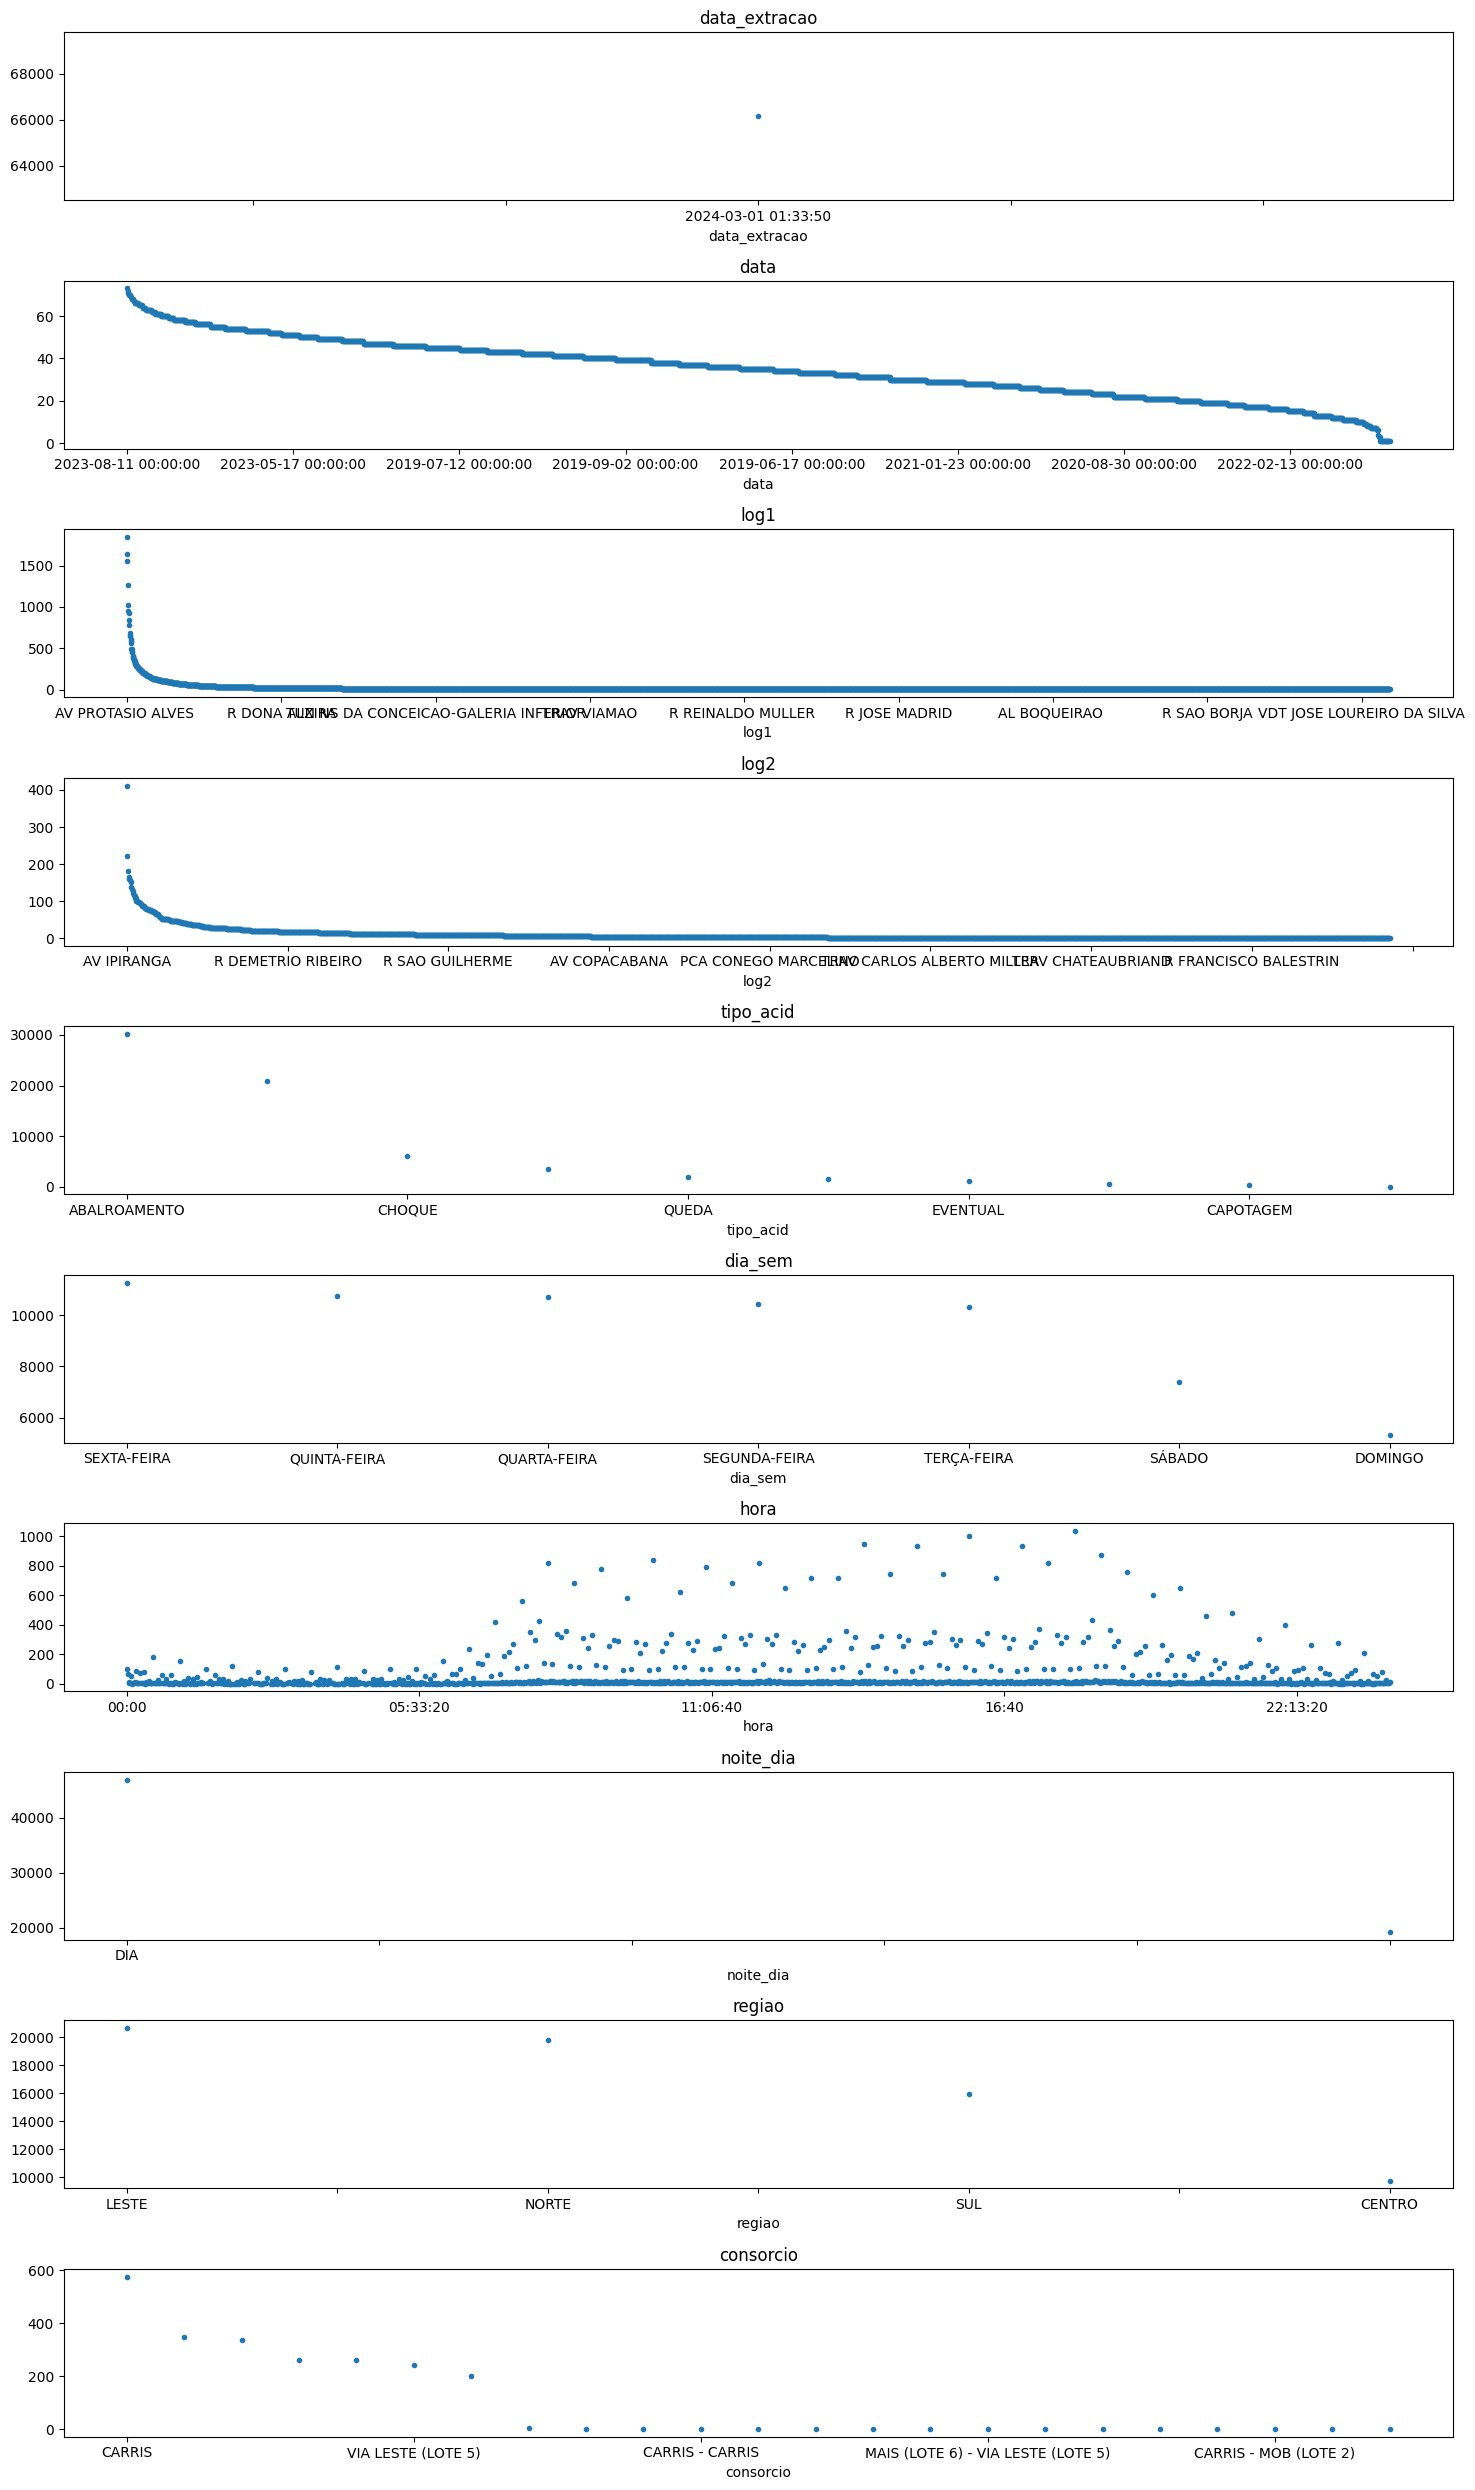

In [32]:
# Criar objeto de figura com 3 subplots.
fig, axes = plt.subplots(ncols=1, nrows=10, figsize=(15, 25))

# Identificar variáveis não-numéricas.
df_non_numerical = acidentes_poa.select_dtypes(exclude=["number"])

# Iterar sobre as variáveis e colocar cada subplot no objeto de eixo matplotlib.
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    # Selecionar uma única feature e contar a frequência por valor único.
    df_non_numerical[col].value_counts().plot(
               title=col, lw=0, marker=".", ax=ax
    )

plt.tight_layout()

Podemos fazer algumas observações:
- O dia **11/08/2023** foi particularmene violento em termos de ocorrências de acidentes - mais de 60 observações. Há muitos dias com uma frequência de observação grande, acima de 20, o que mostra que Porto Alegre apresenta muitos acidentes diariamente.
- A **Avenida Protásio Alves**, como mencionado, é a campeã de acidentes, embora outros logradouros também pareçam concentrar bastante observações. No geral, porém, nota-se uma grande concentração de acidentes em um número de logradouros.
- A **Avenida Ipiranga** concentra boa parte, de longe, dos cruzamentos em que ocorrem acidentes.
- **Abalroamentos**, de longe, concentram boa parte dos tipos de acidentes.
- Se **sexta-feira** é campeã de acidentes, outros dias da semana não ficam muito atrás. **Sábados e domingos**, por sua vez, apresentam bem menos acidentes.
- Como `hora` não foi arredondado para intervalos de tempo, há uma grande distribuição de observações. Porém alguns horários, como mencionado antes, como em torno de **18h**, apresentam elevada frequência. Não é possível, porém, inferir com precisão essa estatística.
- Esmagadora maioria de acidentes no **dia**
- **Leste**, mas também **norte**, dominam as regiões de acidentes.
- O campo `consorcio` aparenta apresentar descrições reduntantes, repetidas ou insuficientes.

Apenas para fins de observação, vams coletar as entradas para os top 10 dias com maior acidentes de acordo com frequência de contagens.

In [33]:
# Coletar inserções de valores de acordo com os dez dias mais frequentes para acidentes.
acidente_datas = acidentes_poa.groupby(by="data").size().nlargest(10).reset_index(name="frequencia")

acidente_datas

,data,frequencia
0,2023-08-11 00:00:00,73
1,2023-12-18 00:00:00,72
2,2023-03-06 00:00:00,71
3,2022-11-30 00:00:00,70
4,2023-05-02 00:00:00,70
5,2023-05-25 00:00:00,70
6,2022-12-07 00:00:00,69
7,2023-03-01 00:00:00,68
8,2023-04-12 00:00:00,68
9,2023-09-15 00:00:00,68


## 3. Investigação do Conteúdo.
Vamos agora explorar diferentes maneiras de rapidamente dar uma olhada geral no nosso conjunto de dados.

### 3.1. Distribuição das variáveis.
Aqui, nosso objetivo é compreender melhor o conteúdo dos nossos dados. Busca-se obter informações úteis em relação a limpeza e transformação de features. Para tanto, vamos criar gráficos de distribuição individuais para cada variável.

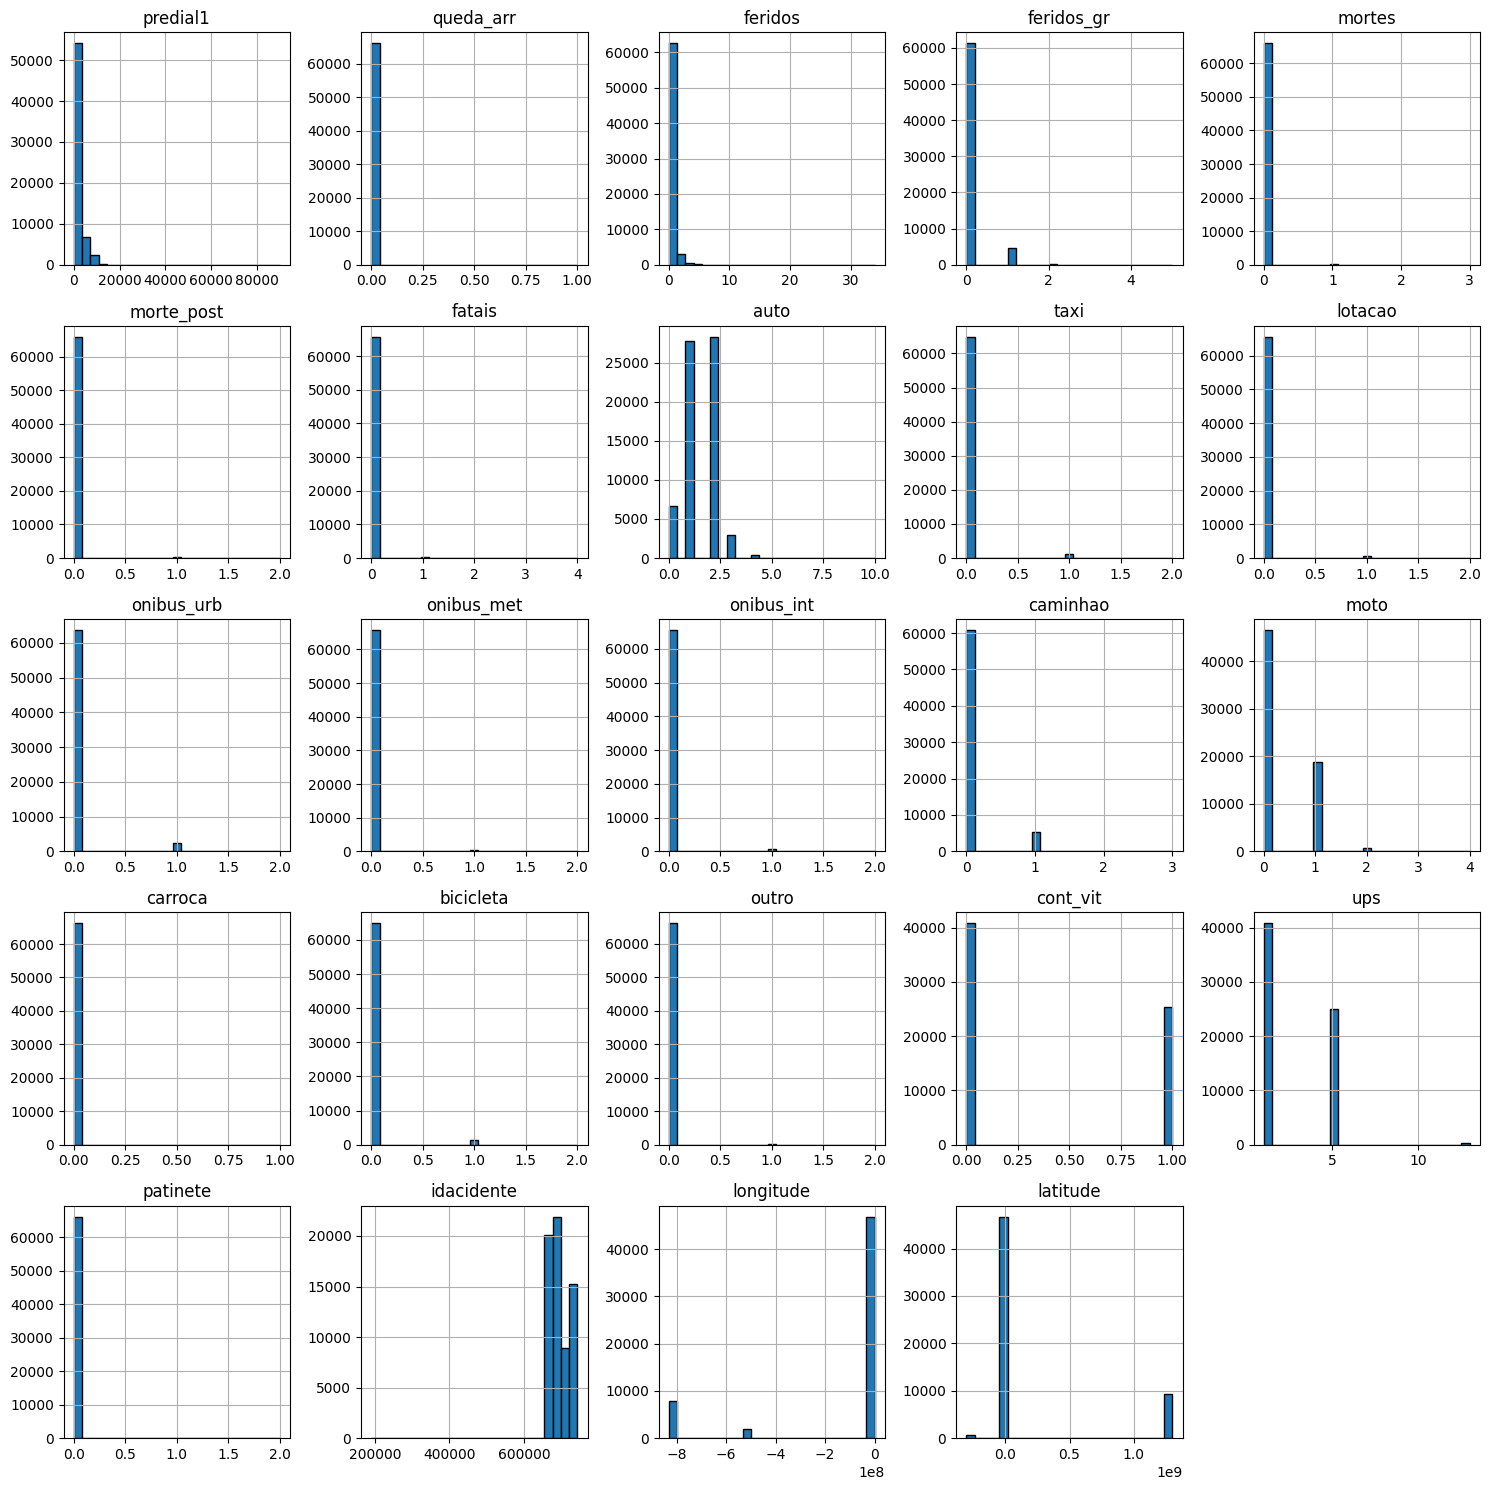

In [34]:
# Plotar histograma de frequência para cada variável numérica em subplots separados.
acidentes_poa.hist(bins=25, figsize=(15, 15), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

Vamos identificar a razão da moda de cada atributo do nosso dataset. Em seguida, vamos visualizar esse resultado.

idacidente       0.955784
data_extracao    0.000015
onibus_met       0.000015
tipo_acid        0.000015
latitude         0.000015
longitude        0.000015
patinete         0.000015
outro            0.000015
bicicleta        0.000015
predial1         0.000015
dtype: float64

<Axes: title={'center': 'Razão de valores iguais à inserção mais frequente'}>

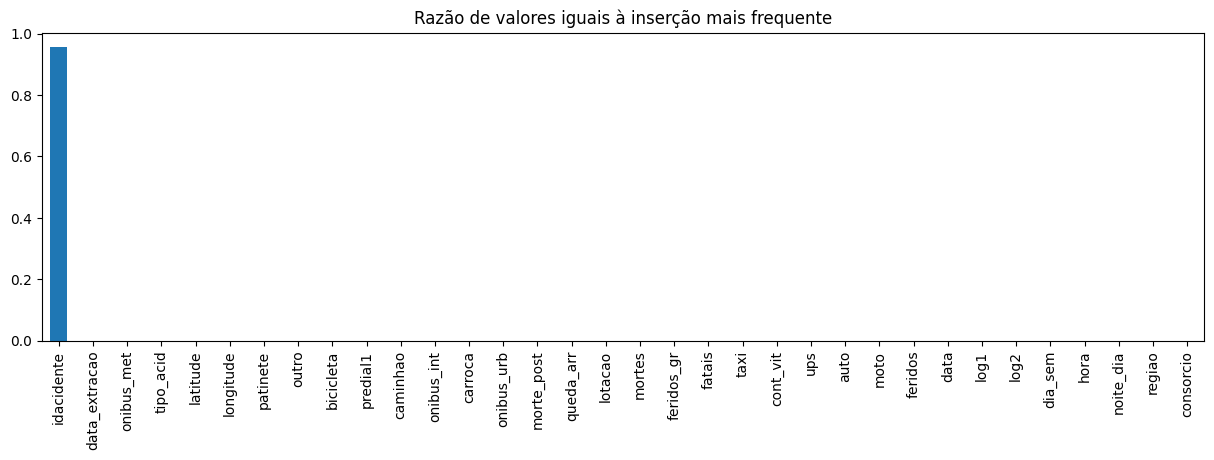

In [35]:
# Para cada atributo, coletar a inserção mais frequente
insercao_mais_frequente = acidentes_poa.mode()

# Para cada entrada, checar se contém a inserção mais frequente.
df_freq = acidentes_poa.eq(insercao_mais_frequente.values, axis=1)

# Computar a média de valores verdadeiros por coluna.
df_freq = df_freq.mean().sort_values(ascending=False)

# Mostrar as 10 inserções com maior razão de valores verdadeiros.
display(df_freq.head(10))

# Visualizar a tabela
df_freq.plot.bar(figsize=(15, 4), title="Razão de valores iguais à inserção mais frequente")


## 3.2 Padrões de distribuição ##
Para simplfiicar nosso trabalho, vamos tratar variáveis com menos de 25 observações únicas como **discretas/ordinais**.

In [54]:
# Criar máscara para identificar variáveis numéricas com mais ou menos de 25 observações únicas.
cols_continuas = acidentes_poa.select_dtypes(include="number").nunique() > 25

### 3.2.1. Variáveis contínuas
Vamos usar o `pairplot` do pacote `seaborn` para visualizar a reação entre essas variáveis. 

In [55]:
# Criar novo DataFrame que contenha apenas variáveis contínuas.	
df_continua = acidentes_poa[cols_continuas[cols_continuas].index]
df_continua.shape

(66153, 4)

MemoryError: Unable to allocate 157. GiB for an array with shape (21050276227,) and data type float64

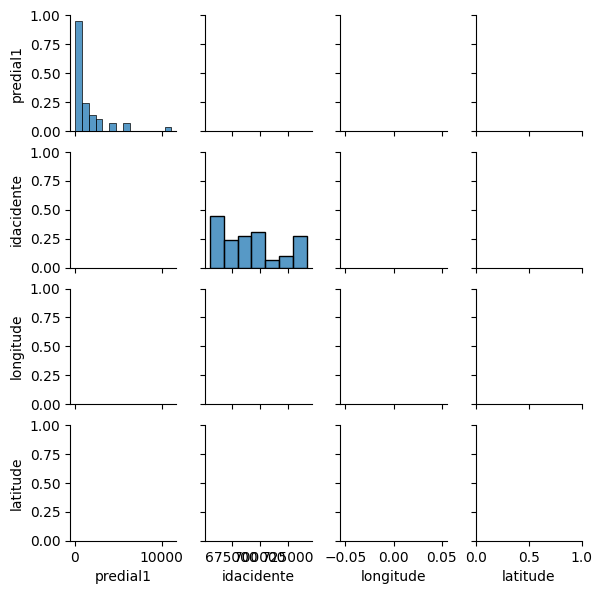

In [58]:
sns.pairplot(df_continua.iloc[:, :5].sample(50), height=1.5, plot_kws={"s": 2, "alpha": 0.8})

Problema: do jeito que os dados estão dispostos, parece haver muita granularidade para fazer qualquer comparação. Esse problema deve-se também ao erro de inserção de dados em latitudes e longitudes. Vamos ter que corrigir agora.


In [60]:
acidentes_poa[['latitude', 'longitude']].describe()

,latitude,longitude
count,5.660100e+04,5.660100e+04
mean,2.073546e+08,-1.319533e+08
std,4.798038e+08,2.931126e+08
min,-3.018613e+08,-8.314146e+08
25%,-3.005935e+01,-5.122809e+01
50%,-3.002956e+01,-5.119987e+01
75%,-2.999999e+01,-5.116380e+01
max,1.298214e+09,0.000000e+00


In [76]:
acidentes_poa_coord = acidentes_poa[(
    acidentes_poa["latitude"] > -30.0 ) & (acidentes_poa["latitude"] < -29) &
    (acidentes_poa["longitude"] > -52.5) & (acidentes_poa["longitude"] < -50.0)]   

In [81]:
acidentes_poa_coord

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
6,2024-03-01 01:33:50,446.0,0.0,2019-01-02 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0,655777,-51.201195,-29.999522,AV SERTORIO,NaN,COLISÃO,QUARTA-FEIRA,07:00:00,DIA,NORTE,NaN
30,2024-03-01 01:33:50,5905.0,0.0,2019-01-04 00:00:00,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,655814,-51.145846,-29.998044,AV SERTORIO,NaN,ABALROAMENTO,SEXTA-FEIRA,11:30:00,DIA,NORTE,NaN
53,2024-03-01 01:33:50,4481.0,0.0,2019-01-06 00:00:00,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,5,0,655839,-51.159839,-29.998965,AV SERTORIO,NaN,ABALROAMENTO,DOMINGO,18:13:00,NOITE,NORTE,MOB (LOTE 2)
82,2024-03-01 01:33:50,4595.0,0.0,2019-01-01 00:00:00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,655950,-51.159505,-29.998740,AV SERTORIO,AV POLAR,ABALROAMENTO,TERÇA-FEIRA,13:00:00,DIA,NORTE,MOB (LOTE 2)
93,2024-03-01 01:33:50,336.0,0.0,2019-01-02 00:00:00,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,655961,-51.190721,-29.999023,AV CEARA,R DEZOITO DE NOVEMBRO,ABALROAMENTO,QUARTA-FEIRA,18:20:00,NOITE,NORTE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66112,2024-03-01 01:33:50,6580.0,0.0,2024-02-22 00:00:00,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,742304,-51.128770,-29.993410,AV ASSIS BRASIL,NaN,COLISÃO,QUINTA-FEIRA,14:45:00,DIA,NORTE,NaN
66118,2024-03-01 01:33:50,7085.0,0.0,2024-02-22 00:00:00,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,742310,-51.125284,-29.990543,AV ASSIS BRASIL,NaN,COLISÃO,QUINTA-FEIRA,07:20:00,DIA,NORTE,NaN
66183,2024-03-01 01:33:50,299.0,0.0,2024-02-23 00:00:00,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,742375,-51.171733,-29.984412,AV JORGE BENJAMIN ECKERT,NaN,ABALROAMENTO,SEXTA-FEIRA,09:50:00,DIA,NORTE,NaN
66187,2024-03-01 01:33:50,1028.0,0.0,2023-12-18 00:00:00,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,742379,-51.194724,-29.988585,AV A J RENNER,NaN,COLISÃO,SEGUNDA-FEIRA,21:30:00,NOITE,NORTE,NaN


In [82]:
cols_continuas = acidentes_poa_coord.select_dtypes(include="number").nunique() > 25

In [85]:
# Criar novo DataFrame que contenha apenas variáveis contínuas.	
df_continua = acidentes_poa_coord[cols_continuas[cols_continuas].index]
df_continua.shape

(4305, 4)

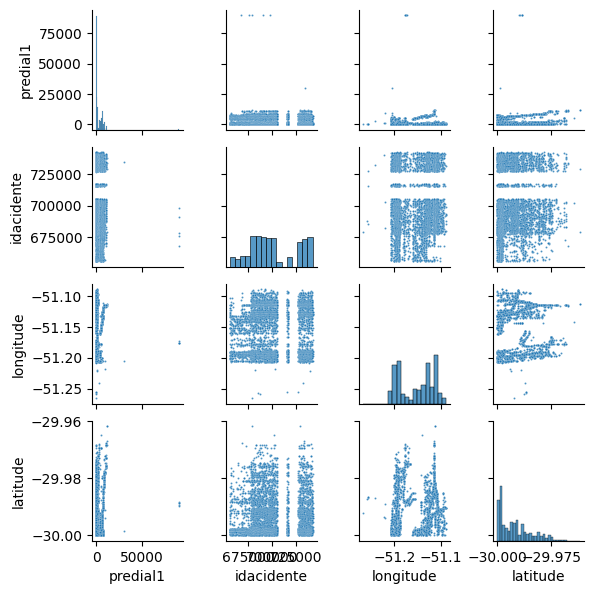

In [88]:
sns.pairplot(df_continua, height=1.5, plot_kws={"s": 2, "alpha": 0.8})

### 3.2.2. Variáveis discretas e ordinais
Vamos agora usar a máscara que criamos para investigar variáveis discretas.

In [89]:
# Criar novo dataframe que não contenha colunas contínuas.
df_discreta = acidentes_poa[cols_continuas[~cols_continuas].index]
df_discreta.shape

(66153, 20)

In [93]:
df_discreta

,queda_arr,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete
0,0.0,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,5,0
1,0.0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0
2,0.0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,5,0
3,0.0,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0
4,0.0,5,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66205,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
66206,0.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,5,0
66207,0.0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0
66208,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0


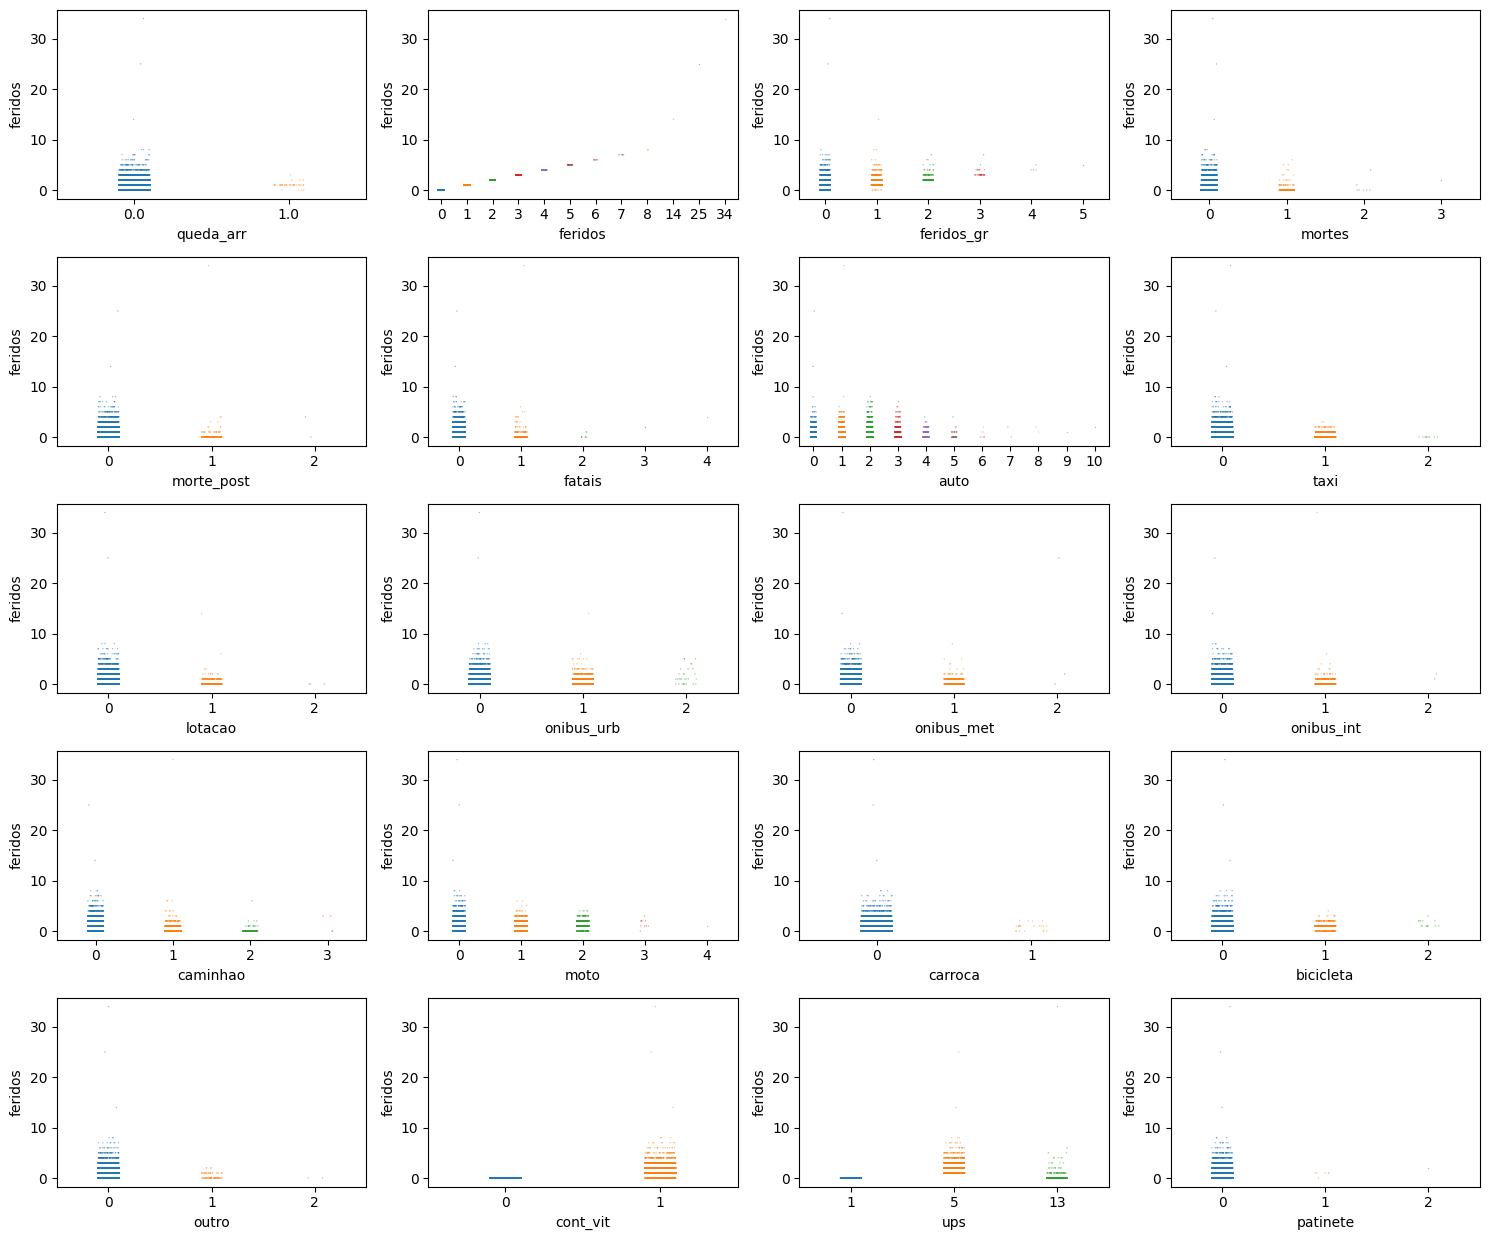

In [99]:
# Estabelecer número de colunas e linhas para plotar todas as variáveis.
n_cols = 4
n_elements = len(df_discreta.columns)
n_rows = np.ceil(n_elements / n_cols).astype(int)

# Especificar  y_value para plotar cada variável. Usar uma variável contínua, mesmo que abaixo do limite de 25 observações únicas.
y_value = acidentes_poa["feridos"]

# Criar objeto de figura com subplots.
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Iterar sobre as variáveis e colocar cada subplot no objeto de eixo matplotlib.
for col, ax in zip(df_discreta.columns, axes.ravel()):
    sns.stripplot(data=acidentes_poa, x=col, y=y_value, ax=ax, palette="tab10", hue=col, legend=False, size=1, alpha=0.5)
plt.tight_layout()